## Introduction ot Regression with Neural Networks in TensorFlow

There are many defination for a regression problme but in ur case,

**we're going to simplify it:**

  predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

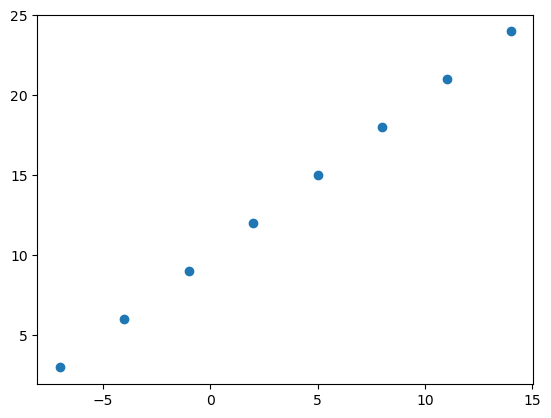

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# create feature

X=np.array([-7,-4,-1,2,5,8,11,14])

# create label
y=np.array([3,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


# Input and Output

In [2]:

housing_info=tf.constant(["breedroom","bathroom","garage"])

housing_price=tf.constant([93400])



In [3]:
# Turn x and y to Tensor

X=tf.constant(X,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modelling with Tenserflow 🏛️

1. createa a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. compile a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. fitting a model - letting the model try to find patterns between X & y (features and labels).

4. evaluate a model - how well the model is doing.

In [4]:
# set random seed

tf.random.set_seed(42)

# 1. create a model using sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden Layer
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(),
              loss=tf.keras.losses.mae, # mean absolute error,
              metrics=["mae"]
              )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated to expand dims

Epoch 1/5


2023-07-07 08:44:51.149986: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 307ms/step - loss: 16.6172 - mae: 16.6172
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 16.3359 - mae: 16.3359
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 16.0547 - mae: 16.0547
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 15.7734 - mae: 15.7734
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 15.4922 - mae: 15.4922


In [5]:
# check out X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# Try to make prediction

model.predict([20])


1/1 [==============================] - 0s 68ms/step


array([[-9.444559]], dtype=float32)

## Improving the Model

we can improve  our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [7]:
# lets rebuild the model

# 1. create the model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (longer Time)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated to expand dims


Epoch 1/100
1/1 [==============================] - 0s 146ms/step - loss: 19.3487 - mae: 19.3487
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 19.0675 - mae: 19.0675
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 18.7862 - mae: 18.7862
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 18.5050 - mae: 18.5050
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 18.2237 - mae: 18.2237
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 17.9425 - mae: 17.9425
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 17.6612 - mae: 17.6612
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 17.3800 - mae: 17.3800
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 17.0987 - mae: 17.0987
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 16.8175 - mae: 16.8175
Epoch 11/100
1/1 [==============================] - 0s 8

In [8]:
model.predict([17])

1/1 [==============================] - 0s 34ms/step


array([[29.210154]], dtype=float32)

In [9]:
# Recreate model 2 with extra 100 layers

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)



Epoch 1/100


/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 262ms/step - loss: 13.9537 - mae: 13.9537
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2694 - mae: 13.2694
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5851 - mae: 12.5851
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8998 - mae: 11.8998
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2119 - mae: 11.2119
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5201 - mae: 10.5201
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8229 - mae: 9.8229
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.1184 - mae: 9.1184
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4042 - mae: 8.4042
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6778 - mae: 7.6778
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 6.936

In [10]:
model.predict([17])

1/1 [==============================] - 0s 53ms/step


array([[27.069542]], dtype=float32)

# Evalting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation there are 3 words you should memorize:

>  "Visualize, visualize, visualize"

it's a good idea to visualize:

* The data - what data are we working with? what does it look like?


* The model itself - what does our model look like?


* The training of a model - how does a model perform while it learns?

* The Predictions of the model- how do the predictions of a model line up against the ground truth (the original labels)?

Let's see some examples.

In [17]:
# make a bigger dataset
X=tf.range(-100,100,4)
# Make labels for the dataset
y=X+10 # this the formulat that our model should learnl



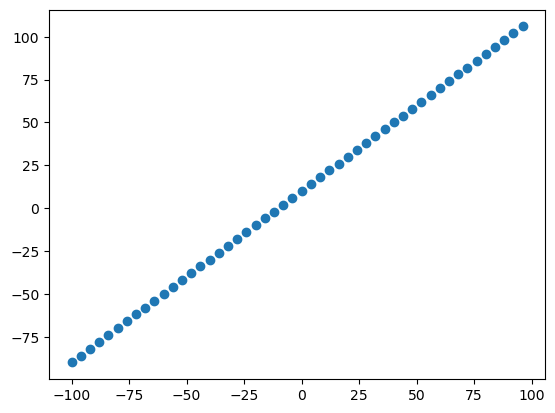

In [18]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [28]:
# split the dataset
# 80% training and 20% for testing

train=int(len(X) *0.8)
test=int(len(X)-train)

x_train,x_test=X[0:train],X[test:]

x_train,x_test=y[0:train],y[test:]
